In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

In [68]:
airbnb_data=pd.read_csv("D:\\nyc_airbnb.csv")

In [69]:
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [70]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# seperating categorical and numerical data

In [71]:
cat_data=airbnb_data.select_dtypes(include=['object'])
num_data=airbnb_data.select_dtypes(exclude=['object'])

In [72]:
def print_columns(non_numeric,numeric):
    print('non_numeric columns:')
    for col in non_numeric:
        print(col)
    print('')
    print('numeric columns:')
    for col in numeric:
        print(col)
        
print_columns(cat_data,num_data)

non_numeric columns:
name
host_name
neighbourhood_group
neighbourhood
room_type
last_review

numeric columns:
id
host_id
latitude
longitude
price
minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365


In [73]:
airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [74]:
def perc_missing(data):
    for column in data:
        perc=data[column].isnull().mean()*100
        if perc!=0:
            print(f'{column} -> {perc}')
perc_missing(airbnb_data)

name -> 0.03272318232948154
host_name -> 0.04294917680744453
last_review -> 20.55833929849678
reviews_per_month -> 20.55833929849678


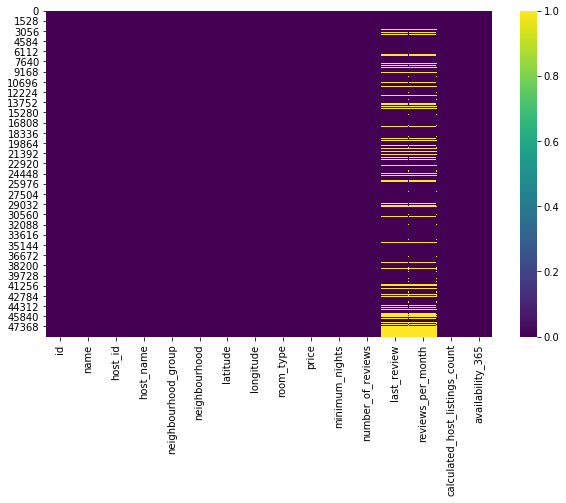

In [75]:
plt.figure(figsize=(10,6))
sns.heatmap(airbnb_data.isnull(),cmap='viridis')

In [76]:
cols_to_drop=['id','host_name','last_review']
airbnb_data.drop(cols_to_drop,inplace=True,axis=1)


In [77]:
perc_missing(airbnb_data)

name -> 0.03272318232948154
reviews_per_month -> 20.55833929849678


# imputation

In [78]:
airbnb_data['price'].isnull().sum()

0

In [79]:
# filling the empty reviews_per_month colum by using "ffill"

airbnb_data['reviews_per_month'].ffill(inplace=True)

In [80]:
airbnb_data['reviews_per_month'].isnull().sum()

0

In [81]:
airbnb_data.isnull().sum()
perc_missing(airbnb_data)

name -> 0.03272318232948154


In [82]:
# filling the names with NONE

airbnb_data['name'].fillna('none',inplace=True)

In [83]:
airbnb_data.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [84]:
# checking spelling errors
airbnb_data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [85]:
#check for duplicates
airbnb_data.duplicated().any()

False

In [86]:
# change dtypes to reduce memory
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [87]:
#host_id can be int32

airbnb_data['host_id']=airbnb_data['host_id'].astype('int32')
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int32  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

# Outliers

In [88]:
airbnb_data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.395810,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.681327,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.200000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.790000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<Figure size 864x432 with 0 Axes>

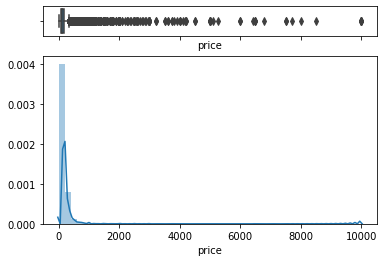

In [89]:
#price- histogram and boxplot
plt.figure(figsize=(12,6))
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(airbnb_data['price'],ax=ax_box)
sns.distplot(airbnb_data['price'],ax=ax_hist)

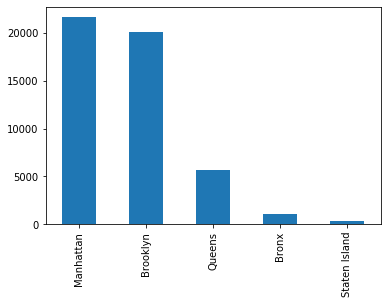

In [90]:
airbnb_data['neighbourhood_group'].value_counts().plot.bar()

Text(0.5, 1.0, 'PRICE old boxplot')

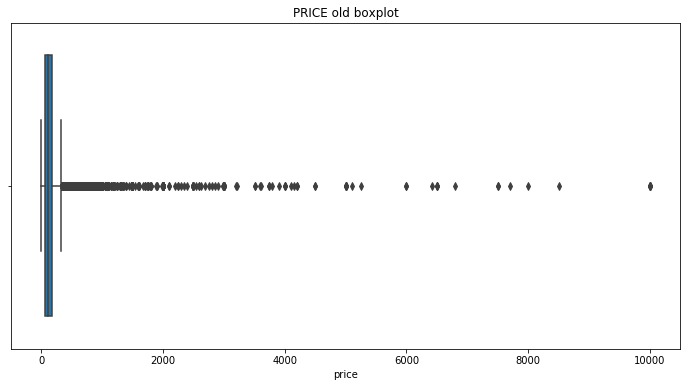

In [141]:
#As previous box plot showed us that price has so many outliers
plt.figure(figsize=(12,6))
sns.boxplot(airbnb_data['price']).set_title('PRICE old boxplot')

In [92]:
#calculate the IQR range and then use 1.5*IQR as outlier 
q25,q75=np.percentile(airbnb_data['price'],25),np.percentile(airbnb_data['price'],75)
iqr=q75-q25
iqr

106.0

In [93]:
cutoff=1.5*iqr
lower=q25-cutoff
upper=q75+cutoff

In [117]:
#number of outliers are as follows in price column
outliers=[x for x in airbnb_data['price'] if x<lower or x>upper]
def num_of_outliers(data):
    count=0
    for outlier in data:
        count+=1
    return count

num_of_outliers(outliers)
        

2972

In [118]:
len(outliers)

2972

In [124]:
# data with no outliers
remaining_pricedata=[x for x in airbnb_data['price'] if x>=lower and x<=upper]
len(remaining_pricedata)

45923

In [125]:
#dropping the outliers columns from whole data
airbnb_data_new1=airbnb_data[airbnb_data['price']>=lower]

In [126]:
airbnb_data_new2=airbnb_data_new1[airbnb_data_new1['price']<=upper]

In [127]:
airbnb_data_new2

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.38,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,1.00,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,1.00,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1.00,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,1.00,6,2


In [128]:
#len(remaining_pricedata) is 45923 and our airbnb_data_new2 after removing outliers also has 459223 rows & 13 columns
#We have successfully removed the outliers in price column from the data 

Text(0.5, 1.0, 'PRICE new boxplot')

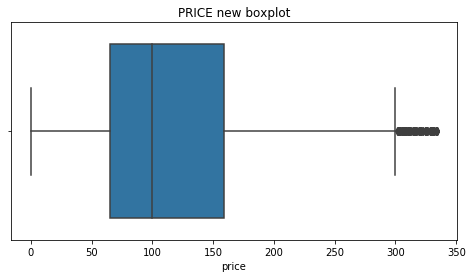

In [142]:
plt.figure(figsize=(8,4))
sns.boxplot(airbnb_data_new2['price']).set_title('PRICE new boxplot')

#THE boxplot is perfectly fine now that the outliers have been removed